<a href="https://colab.research.google.com/github/imelda18/quizapp/blob/main/final_final_88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

***1. Setup Kaggle API and Dataset Download***

In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"imeldd","key":"7fbce2dfe18b7ad84106ec95c831721b"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:11<00:00, 255MB/s]
100% 2.29G/2.29G [00:11<00:00, 205MB/s]


In [5]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

***2. Check the folder structure***

In [6]:

train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

print("Train data:", os.listdir(train_dir))
print("Validation data:", os.listdir(val_dir))
print("Test data:", os.listdir(test_dir))


Train data: ['PNEUMONIA', 'NORMAL']
Validation data: ['PNEUMONIA', 'NORMAL']
Test data: ['PNEUMONIA', 'NORMAL']


In [7]:
print("Train samples:", len(os.listdir(train_dir + '/PNEUMONIA')) + len(os.listdir(train_dir + '/NORMAL')))
print("Validation samples:", len(os.listdir(val_dir + '/PNEUMONIA')) + len(os.listdir(val_dir + '/NORMAL')))
print("Test samples:", len(os.listdir(test_dir + '/PNEUMONIA')) + len(os.listdir(test_dir + '/NORMAL')))


Train samples: 5216
Validation samples: 16
Test samples: 624


***3. Split the data 70% train, 20% validation, 10% test***

In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split


pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
normal_dir = os.path.join(train_dir, 'NORMAL')

pneumonia_files = os.listdir(pneumonia_dir)
normal_files = os.listdir(normal_dir)

pneumonia_train, pneumonia_val = train_test_split(pneumonia_files, test_size=0.2, random_state=42)
normal_train, normal_val = train_test_split(normal_files, test_size=0.2, random_state=42)

val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')
val_normal_dir = os.path.join(val_dir, 'NORMAL')
os.makedirs(val_pneumonia_dir, exist_ok=True)
os.makedirs(val_normal_dir, exist_ok=True)


for file in pneumonia_val:
    shutil.move(os.path.join(pneumonia_dir, file), os.path.join(val_pneumonia_dir, file))
for file in normal_val:
    shutil.move(os.path.join(normal_dir, file), os.path.join(val_normal_dir, file))

print("Train samples:", len(os.listdir(pneumonia_dir)) + len(os.listdir(normal_dir)))
print("Validation samples:", len(os.listdir(val_pneumonia_dir)) + len(os.listdir(val_normal_dir)))
print("Test samples:", len(os.listdir(test_dir + '/PNEUMONIA')) + len(os.listdir(test_dir + '/NORMAL')))


Train samples: 4172
Validation samples: 1060
Test samples: 624


***4. Class Distribution***

In [9]:
import os

train_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
val_normal = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
val_pneumonia = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
test_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
test_pneumonia = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

print(f"Training dataset - NORMAL: {train_normal}, PNEUMONIA: {train_pneumonia}")
print(f"Validation dataset - NORMAL: {val_normal}, PNEUMONIA: {val_pneumonia}")
print(f"Test dataset - NORMAL: {test_normal}, PNEUMONIA: {test_pneumonia}")


Training dataset - NORMAL: 1072, PNEUMONIA: 3100
Validation dataset - NORMAL: 277, PNEUMONIA: 783
Test dataset - NORMAL: 234, PNEUMONIA: 390


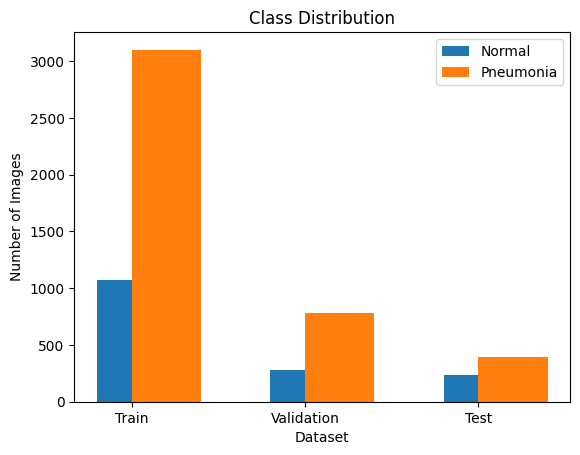

In [10]:
import matplotlib.pyplot as plt

datasets = ['Train', 'Validation', 'Test']
normal_counts = [train_normal, val_normal, test_normal]
pneumonia_counts = [train_pneumonia, val_pneumonia, test_pneumonia]

x = range(len(datasets))

plt.bar(x, normal_counts, width=0.4, label='Normal', align='center')
plt.bar(x, pneumonia_counts, width=0.4, label='Pneumonia', align='edge')

plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(x, datasets)
plt.legend()
plt.show()


***5. Show sample from train data***

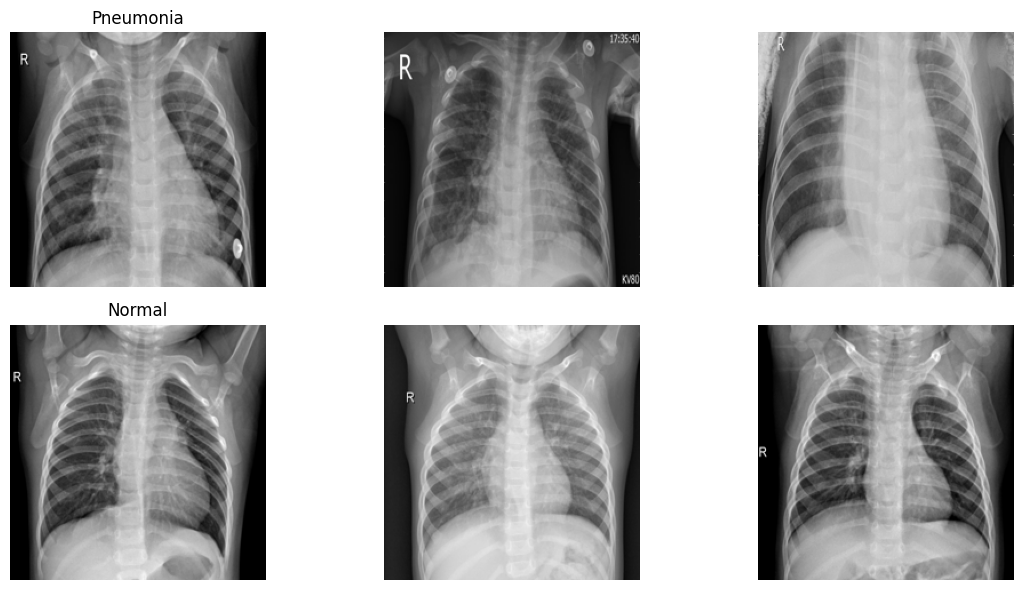

In [11]:
import os
import matplotlib.pyplot as plt
from PIL import Image


train_pneumonia_dir = '/content/chest_xray/train/PNEUMONIA'
train_normal_dir = '/content/chest_xray/train/NORMAL'

pneumonia_files = os.listdir(train_pneumonia_dir)[:3]
normal_files = os.listdir(train_normal_dir)[:3]


plt.figure(figsize=(12, 6))
for i, (p_file, n_file) in enumerate(zip(pneumonia_files, normal_files)):

    plt.subplot(2, 3, i + 1)
    img = Image.open(os.path.join(train_pneumonia_dir, p_file)).convert('RGB')
    img = img.resize((224, 224))
    plt.imshow(img)
    plt.axis('off')
    if i == 0:
        plt.title('Pneumonia')


    plt.subplot(2, 3, i + 4)
    img = Image.open(os.path.join(train_normal_dir, n_file)).convert('RGB')
    img = img.resize((224, 224))
    plt.imshow(img)
    plt.axis('off')
    if i == 0:
        plt.title('Normal')

plt.tight_layout()
plt.show()

***6. Data Preprocessing***

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4172 images belonging to 2 classes.
Found 1060 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


***7. Build CNN Model***

In [13]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

***8. Train the model***

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.array([0, 1]),
    y=train_generator.classes
)


class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)


Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 76s 502ms/step - accuracy: 0.5787 - loss: 0.6247 - val_accuracy: 0.6970 - val_loss: 0.6757
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8438 - loss: 0.3001 - val_accuracy: 0.7500 - val_loss: 1.2647
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 70s 464ms/step - accuracy: 0.8060 - loss: 0.4062 - val_accuracy: 0.8419 - val_loss: 0.3656
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.9375 - loss: 0.1781 - val_accuracy: 0.7500 - val_loss: 0.9390
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 62s 457ms/step - accuracy: 0.8312 - loss: 0.3637 - val_accuracy: 0.8267 - val_loss: 0.3989
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8750 - loss: 0.3419 - val_accuracy: 1.0000 - val_loss: 0.0397
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 62s 455ms/step - accuracy: 0.8748 - loss: 0.2848 - val_accuracy: 0.7850 - val_loss: 0.4514
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 152us/step - accuracy: 0.8438 - loss: 0.2253 -

***9. Evaluate the model***

In [16]:


test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.8684 - loss: 0.3478
Test Accuracy: 88.30%


***10. Display model performance***

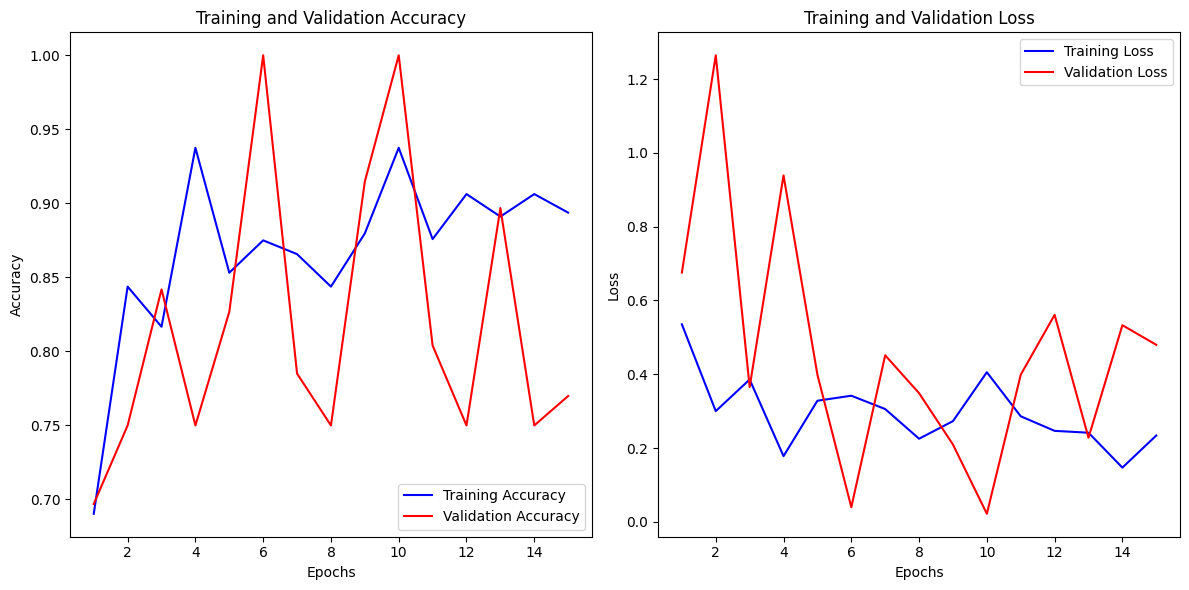

In [17]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()

plt.show()


***11. Confusion Matrix***

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step


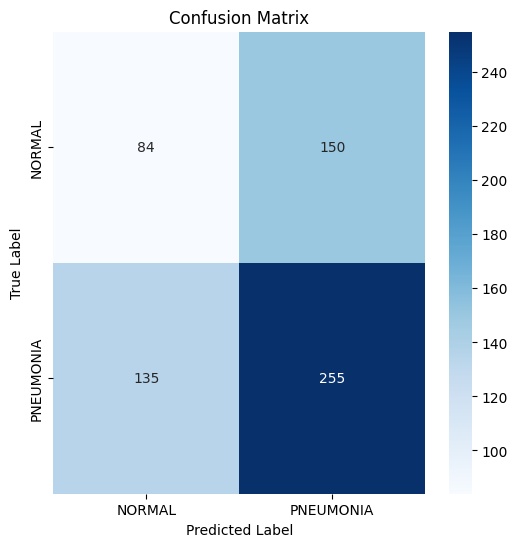

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")


true_labels = test_generator.classes

cm = confusion_matrix(true_labels, predicted_classes)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


***12. Make predictions***

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


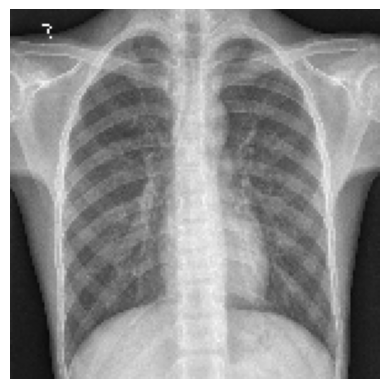

No Pneumonia detected


In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = '/content/chest_xray/test/NORMAL/IM-0005-0001.jpeg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)



plt.imshow(img)
plt.axis('off')
plt.show()


if prediction[0] > 0.5:
    print("Pneumonia detected")
else:
    print("No Pneumonia detected")

***14. Save the model***

In [20]:
model.save('detection_pneumonia_final_final.h5')